This file displays the proportion of tweets belonging to each topic by year. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

### Data Processing

In [3]:
REPLACED_TAGS_FOLDER = "../data/tweets/ten_years_en_replaced_tags"
NUM_TOPICS = 50
MODEL_FOLDER = "50_topics_model"

with open(f"{MODEL_FOLDER}/comp_to_tweet_id_to_doc_num_map.pkl", "rb") as file:
    comp_to_tweet_id_to_doc_num_map = pickle.load(file)

docs_top_topic = np.load(f"{MODEL_FOLDER}/docs_top_topic.npy")

In [ ]:
# Initialize a year to topic to count map
year_topic_count_map = {year: {topic: 0 for topic in range(NUM_TOPICS)} for year in range(2012, 2023)}

# Go through each company csv
for comp_csv in os.listdir(REPLACED_TAGS_FOLDER):
    print(comp_csv)
    file_path = f"{REPLACED_TAGS_FOLDER}/{comp_csv}"
    df = pd.read_csv(file_path, lineterminator='\n')

    if len(df) == 0:
        # Skip this CSV because it has no tweets.
        continue

    assert len(df['tweet_id']) == len(df['created_at'])
    
    for (tweet_id, created_at) in zip(df['tweet_id'], df['created_at']):
        year = int(created_at[:4])

        if year < 2012: continue

        # for each tweet id, get the doc num, and use that to get the topic
        doc_num = comp_to_tweet_id_to_doc_num_map[comp_csv][tweet_id]
        topic = docs_top_topic[doc_num]

        # for whichever topic and whichever year that tweet is from,
        # add 1 to the count for that year to topic to count map
        year_topic_count_map[year][topic] += 1

In [5]:
# we now have a map of year to topic to count
# we want to create a map of year to topic to proportion
year_topic_proportion_map = {year: {topic: 0 for topic in range(NUM_TOPICS)} for year in range(2012, 2023)}

for year in year_topic_count_map:
    one_year_topic_counts = year_topic_count_map[year]
    
    # for each year, count the total number of tweets across all topics 
    total_tweets_in_year = sum([one_year_topic_counts[topic_num] for topic_num in range(NUM_TOPICS)])
    
    # and divide each count by that total to get the proportion
    for topic in one_year_topic_counts:
        year_topic_proportion_map[year][topic] = one_year_topic_counts[topic]/total_tweets_in_year


In [ ]:
# create a df where the first column is the year, and the next few columns are the topic proportions for each topic num
# NOTE: we don't use this df, we use the next one that we create

rows = []

for year in year_topic_proportion_map:
    curr_row = [year]
    one_year_topic_proportions = year_topic_proportion_map[year]
    # we do it like this to guarantee order from 0 to 49,
    # since technically interating over a dict can go in any order
    for topic in range(NUM_TOPICS): 
        curr_row.append(one_year_topic_proportions[topic])

    print(curr_row)
    
    assert len(curr_row) == NUM_TOPICS + 1 # N topics + 1 for the year
    rows.append(curr_row)

In [7]:
COLUMNS = ["year"] + [f"topic{i}" for i in range(NUM_TOPICS)]
year_topic_proportion_df = pd.DataFrame(rows, columns=COLUMNS)
year_topic_proportion_df.head()

,year,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,...,topic40,topic41,topic42,topic43,topic44,topic45,topic46,topic47,topic48,topic49
0,2012,0.121842,0.025260,0.002972,0.005201,0.005201,0.006686,0.004458,0.012630,0.002972,...,0.006686,0.009658,0.011887,0.013373,0.023031,0.024517,0.002972,0.002229,0.023031,0.004458
1,2013,0.159257,0.020852,0.006483,0.005240,0.003511,0.009400,0.005456,0.008373,0.005618,...,0.006537,0.019340,0.012209,0.009184,0.033494,0.028307,0.005834,0.007833,0.030144,0.006699
2,2014,0.125859,0.024133,0.008424,0.007759,0.003864,0.009755,0.005257,0.009818,0.004561,...,0.005447,0.029137,0.012922,0.015170,0.028155,0.030847,0.006429,0.006651,0.029897,0.006968
3,2015,0.107737,0.021433,0.006693,0.006939,0.005235,0.014904,0.007842,0.012810,0.005358,...,0.005297,0.035659,0.017470,0.015643,0.038554,0.028228,0.013016,0.006959,0.031595,0.007083
4,2016,0.096673,0.023254,0.005627,0.003813,0.007699,0.018779,0.007785,0.011440,0.006173,...,0.005267,0.030809,0.020362,0.022391,0.036752,0.029356,0.018837,0.014779,0.032853,0.007814


In [ ]:
# alternatively, create a df where the first column is topic
# and the remaining columns are it's proportions over the years
# NOTE: this is actually a bit more useful, so we use this df
rows2 = []

for topic in range(NUM_TOPICS):
    curr_row = [topic]

    for year in range(2012, 2023):
        curr_row.append(year_topic_proportion_map[year][topic])
    
    print(curr_row)
    
    assert len(curr_row) == 12, f"{topic = }: {len(curr_row) = }" # 11 years + 1 for the topic
    rows2.append(curr_row)

In [9]:
COLUMNS2 = ["topic"] + [i for i in range(2012, 2023)]
topic_year_proportion_df = pd.DataFrame(rows2, columns=COLUMNS2)
topic_year_proportion_df.head()

,topic,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,0.121842,0.159257,0.125859,0.107737,0.096673,0.085496,0.060869,0.057935,0.067127,0.049254,0.043658
1,1,0.025260,0.020852,0.024133,0.021433,0.023254,0.022498,0.019479,0.016475,0.010933,0.010700,0.013358
2,2,0.002972,0.006483,0.008424,0.006693,0.005627,0.005958,0.006786,0.005398,0.005316,0.005926,0.005579
3,3,0.005201,0.005240,0.007759,0.006939,0.003813,0.004576,0.005135,0.003169,0.001203,0.001391,0.000941
4,4,0.005201,0.003511,0.003864,0.005235,0.007699,0.008827,0.007558,0.008574,0.014970,0.010836,0.008801


### Plotting

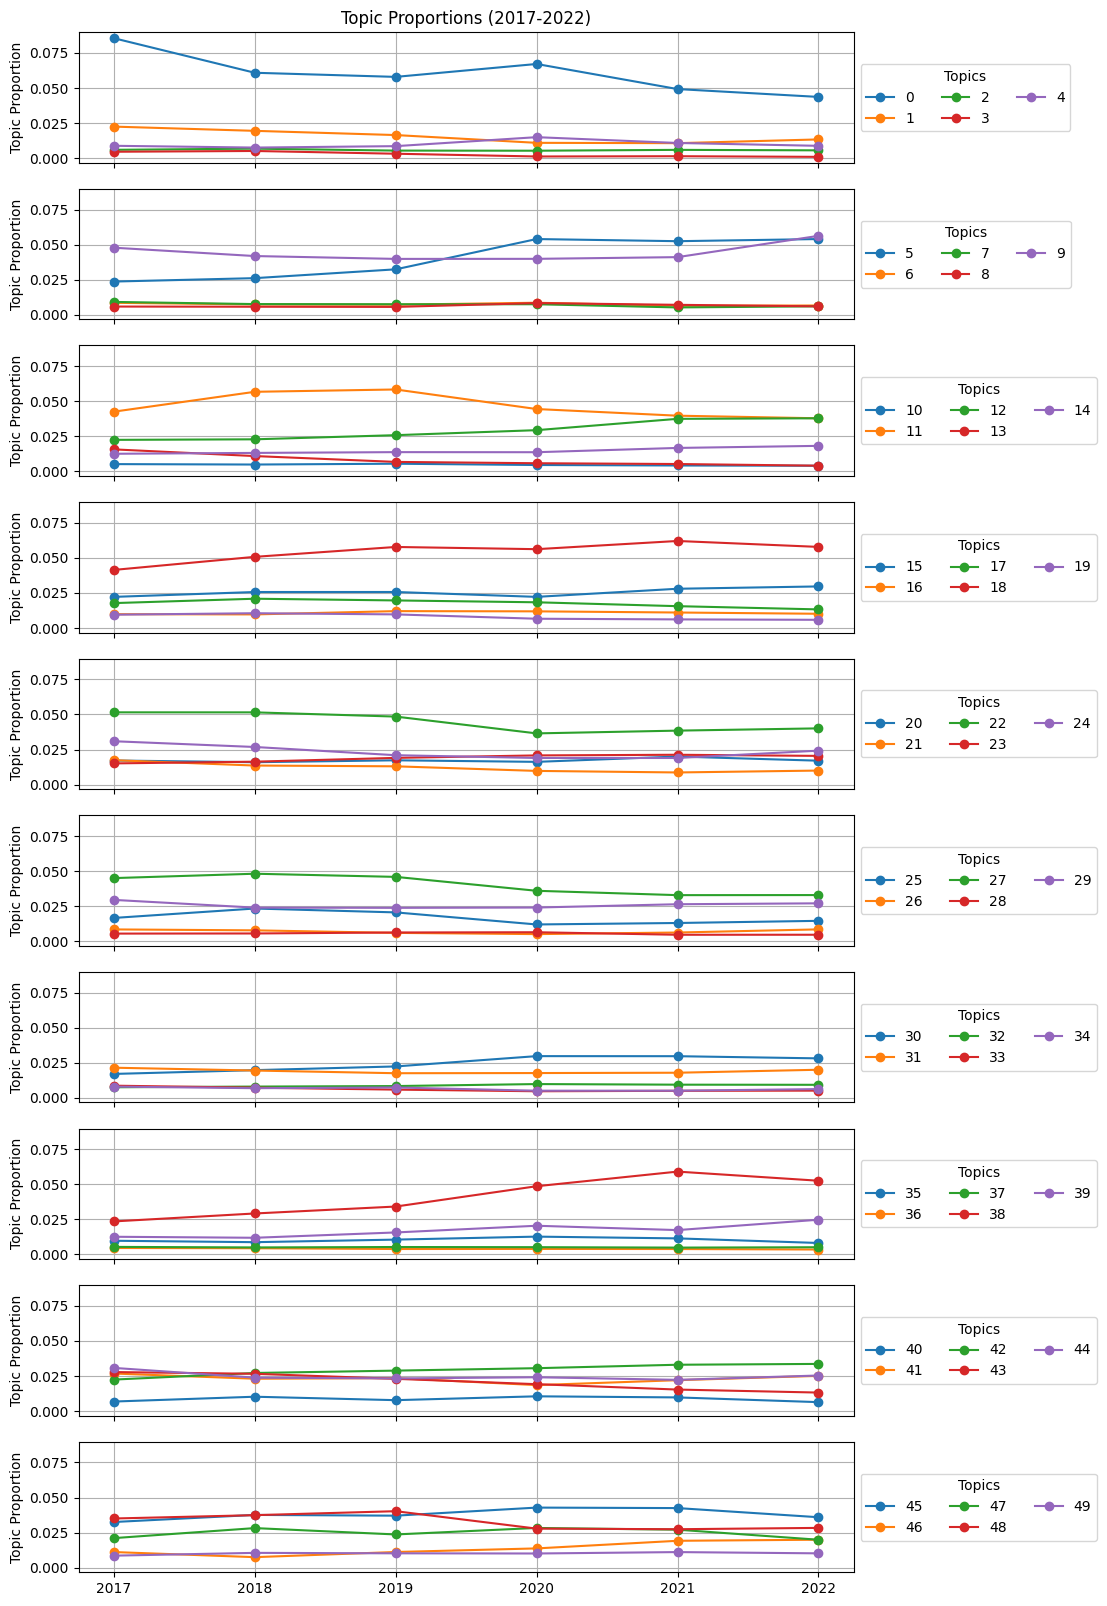

In [34]:
n_subplots = 10
n_per_plot = 50 // n_subplots
fig, axs = plt.subplots(nrows=n_subplots, ncols=1, sharex=True, sharey=True, figsize=(10, 20))
ax = axs[0]
for k, topic in enumerate(topic_year_proportion_df['topic']):
    if k % n_per_plot == 0:
        if k == 0:
            ax.set_title('Topic Proportions (2017-2022)')
        else:
            # plt.xlabel('Years')
            ax.set_ylabel('Topic Proportion')
            ax.legend(title="Topics", loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
            ax.grid(True)
        ax = axs[k // n_per_plot]
    ax.plot(topic_year_proportion_df.columns[6:], topic_year_proportion_df.loc[topic][6:], marker='o', label=topic) # taking [6:] here filters for 2017 and later
ax.set_ylabel('Topic Proportion')
ax.legend(title="Topics", loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
ax.grid(True)
plt.show()

In [ ]:
df_topic_index = topic_year_proportion_df.drop(columns=['topic'], axis=1)
df_topic_index = df_topic_index[df_topic_index.columns[df_topic_index.columns >= 2017]]

# Transpose DataFrame to get years on the x-axis
df_topic_index.T.plot(kind='bar', stacked=True)

plt.xlabel('Years')
plt.ylabel('Proportions')
plt.title('Topic Proportions (2017-2022)')

# Move the legend to the side and split it into two columns
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3, title='Topics')

plt.grid(True)
plt.show()


In [38]:
print("""
   ,topic0        ,topic1      ,topic2      ,topic3          ,topic4      ,topic5         ,topic6     ,topic7    ,topic8        ,topic9   ,topic10         ,topic11       ,topic12         ,topic13         ,topic14   ,topic15         ,topic16  ,topic17     ,topic18       ,topic19         ,topic20 ,topic21   ,topic22     ,topic23        ,topic24   ,topic25    ,topic26             ,topic27     ,topic28    ,topic29     ,topic30    ,topic31   ,topic32     ,topic33   ,topic34      ,topic35     ,topic36     ,topic37    ,topic38        ,topic39    ,topic40      ,topic41       ,topic42     ,topic43     ,topic44   ,topic45      ,topic46      ,topic47         ,topic48       ,topic49
 0 ,support       ,forward     ,new         ,#design         ,health      ,risk           ,work       ,help      ,help          ,win      ,new             ,new           ,global          ,new             ,power     ,energy          ,new      ,help        ,proud         ,water           ,home    ,sure      ,named       ,new            ,-         ,new        ,.                   ,team        ,help       ,financial   ,business   ,make      ,help        ,new       ,new          ,like        ,people      ,new        ,data           ,global     ,products     ,career        ,employees   ,help        ,new       ,learn        ,market       ,patients        ,proud         ,new
 1 ,help          ,look        ,learn       ,📷              ,help        ,latest         ,help       ,time      ,employees     ,chance   ,-               ,technology    ,new             ,-               ,customers ,gas             ,home     ,care        ,women         ,new             ,tips    ,time      ,proud       ,digital        ,|         ,home       ,@                   ,time        ,new        ,growth      ,discuss    ,new       ,employees   ,food      ,power        ,make        ,world       ,help       ,security       ,economic   ,new          ,new           ,work        ,people      ,-         ,experts      ,volume       ,clinical        ,support       ,learn
 2 ,million       ,new         ,latest      ,#newellbrands   ,support     ,key            ,make       ,team      ,support       ,new      ,learn           ,solutions     ,climate         ,#logistics      ,crews     ,emissions       ,help     ,improve     ,work          ,help            ,help    ,learn     ,year        ,industry       ,new       ,like       ,👏                  ,new         ,supply     ,results     ,new        ,just      ,support     ,-         ,help         ,help        ,make        ,know       ,new            ,market     ,tobacco      ,opportunities ,people      ,heart       ,latest    ,discuss      ,near         ,new             ,students      ,data
 3 ,food          ,great       ,product     ,user            ,care        ,help           ,working    ,make      ,work          ,✅       ,results         ,design        ,companies       ,products        ,weather   ,reduce          ,online   ,health      ,commitment    ,energy          ,make    ,free      ,years       ,business       ,/         ,space      ,📸                 ,employees   ,reduce     ,earnings    ,leaders    ,favorite  ,financial   ,just      ,energy       ,home        ,new         ,make       ,help           ,new        ,help         ,students      ,support     ,know        ,travel    ,webinar      ,•            ,help            ,excited       ,latest
 4 ,local         ,looking     ,drug        ,#yum            ,access      ,supply         ,new        ,like      ,people        ,time     ,latest          ,learn         ,future          ,supply          ,safety    ,carbon          ,right    ,patients    ,support       ,sustainable     ,time    ,booth     ,list        ,latest         ,live      ,just       ,#dating             ,holiday     ,increase   ,quarter     ,global     ,like      ,need        ,years     ,technology   ,new         ,–           ,time       ,digital        ,oil        ,information  ,job           ,help        ,health      ,want      ,virtual      ,options      ,research        ,event         ,technology
""")


   ,topic0        ,topic1      ,topic2      ,topic3          ,topic4      ,topic5         ,topic6     ,topic7    ,topic8        ,topic9   ,topic10         ,topic11       ,topic12         ,topic13         ,topic14   ,topic15         ,topic16  ,topic17     ,topic18       ,topic19         ,topic20 ,topic21   ,topic22     ,topic23        ,topic24   ,topic25    ,topic26             ,topic27     ,topic28    ,topic29     ,topic30    ,topic31   ,topic32     ,topic33   ,topic34      ,topic35     ,topic36     ,topic37    ,topic38        ,topic39    ,topic40      ,topic41       ,topic42     ,topic43     ,topic44   ,topic45      ,topic46      ,topic47         ,topic48       ,topic49
 0 ,support       ,forward     ,new         ,#design         ,health      ,risk           ,work       ,help      ,help          ,win      ,new             ,new           ,global          ,new             ,power     ,energy          ,new      ,help        ,proud         ,water           ,home    ,sure      ,named      